In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.DataFrame(pd.read_csv(r"C:\Users\hp5cd\Documents\machine learning\EV efficiency\EV Energy Efficiency Dataset.csv"))
df.head()

,Model year,Make,Model,Vehicle class,Motor (kW),Recharge time (h),Energy Efficiency (km/kWh)
0,2012,Mitsubishi,i-MiEV,Subcompact,49,7.0,5.347594
1,2012,Nissan,LEAF,Mid-size,80,7.0,4.739336
2,2013,Ford,Focus Electric,Compact,107,4.0,5.000000
3,2013,Mitsubishi,i-MiEV,Subcompact,49,7.0,5.347594
4,2013,Nissan,LEAF,Mid-size,80,7.0,4.739336


In [3]:
df.describe()

,Model year,Motor (kW),Recharge time (h),Energy Efficiency (km/kWh)
count,1197.000000,1197.000000,1197.000000,1197.000000
mean,2023.231412,341.289891,10.547285,4.453765
std,2.881857,152.722951,2.706302,0.856691
min,2012.000000,35.000000,3.000000,2.114165
25%,2022.000000,230.000000,8.500000,3.787879
50%,2024.000000,335.000000,10.500000,4.366812
75%,2025.000000,420.000000,12.000000,5.102041
max,2026.000000,930.000000,18.600000,6.944444


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model year                  1197 non-null   int64  
 1   Make                        1197 non-null   object 
 2   Model                       1197 non-null   object 
 3   Vehicle class               1197 non-null   object 
 4   Motor (kW)                  1197 non-null   int64  
 5   Recharge time (h)           1197 non-null   float64
 6   Energy Efficiency (km/kWh)  1197 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 65.6+ KB


In [5]:
df.isnull().sum()

Model year                    0
Make                          0
Model                         0
Vehicle class                 0
Motor (kW)                    0
Recharge time (h)             0
Energy Efficiency (km/kWh)    0
dtype: int64

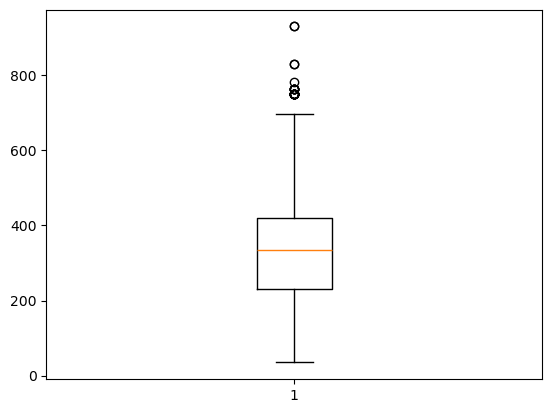

In [6]:
plt.boxplot(df['Motor (kW)'])
plt.show()

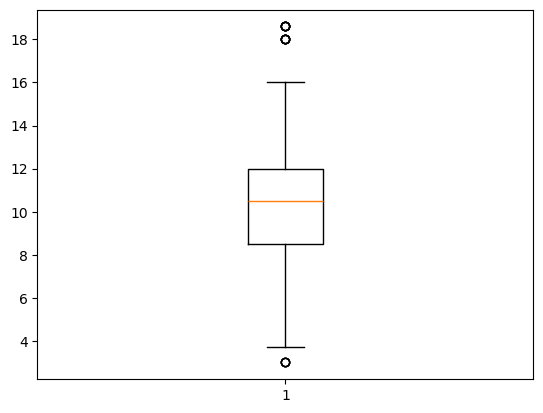

In [7]:
plt.boxplot(df['Recharge time (h)'])
plt.show()

In [8]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Motor (kW)',
       'Recharge time (h)', 'Energy Efficiency (km/kWh)'],
      dtype='object')

In [9]:
cols = ['Motor (kW)', 'Recharge time (h)']
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df[col] = np.where(df[col]<lower, lower, np.where(df[col]>upper, upper, df[col]))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model year                  1197 non-null   int64  
 1   Make                        1197 non-null   object 
 2   Model                       1197 non-null   object 
 3   Vehicle class               1197 non-null   object 
 4   Motor (kW)                  1197 non-null   float64
 5   Recharge time (h)           1197 non-null   float64
 6   Energy Efficiency (km/kWh)  1197 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 65.6+ KB


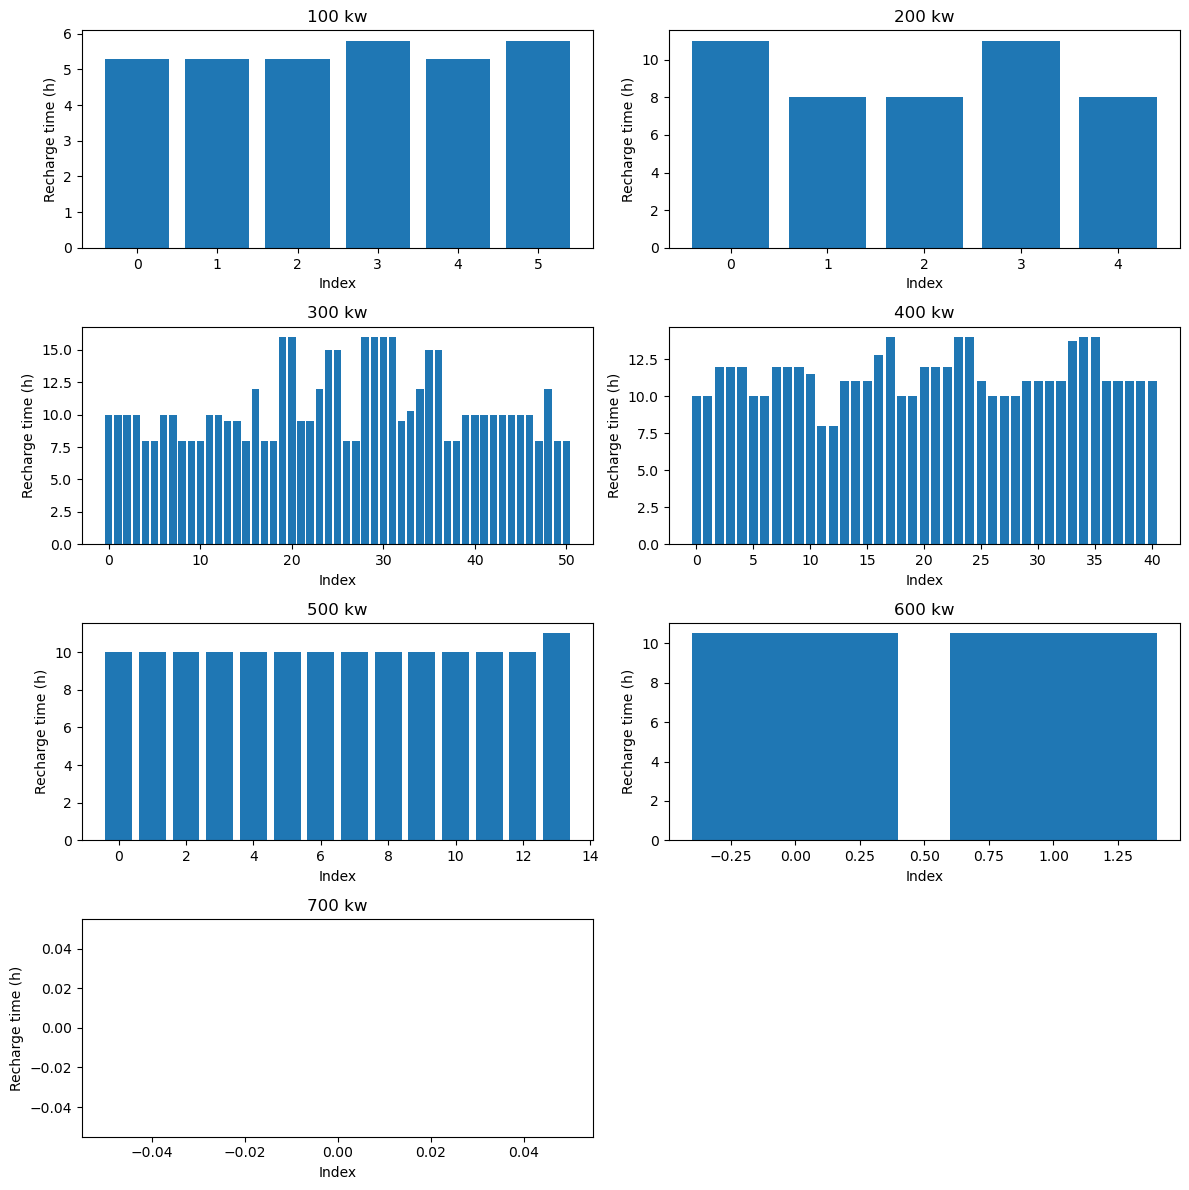

In [11]:
motors = [100, 200, 300, 400, 500, 600, 700]
title = ['100 kw', '200 kw', '300 kw', '400 kw', '500 kw', '600 kw', '700 kw']
plt.figure(figsize=(12, 12))
for idx, motor in enumerate(motors):
    plt.subplot(4, 2, idx+1)
    data = (df[df["Motor (kW)"] == motor] ['Recharge time (h)'])
    plt.bar(range(len(data)), data)
    plt.xlabel("Index")
    plt.ylabel('Recharge time (h)')
    plt.title(title[idx])
plt.tight_layout()
plt.show()

In [12]:
df['Vehicle class'].unique()

array(['Subcompact', 'Mid-size', 'Compact', 'Two-seater', 'Full-size',
       'Station wagon: Small', 'Sport utility vehicle: Standard',
       'Sport utility vehicle: Small', 'Pickup truck: Standard',
       'Minicompact', 'Station wagon: Mid-size', 'Minivan'], dtype=object)

In [13]:
df = pd.get_dummies(df, columns=['Make', 'Model', 'Vehicle class'], drop_first=True)

In [14]:
df.head()

,Model year,Motor (kW),Recharge time (h),Energy Efficiency (km/kWh),Make_Audi,Make_BMW,Make_Cadillac,Make_Chevrolet,Make_Dodge,Make_FIAT,...,Vehicle class_Mid-size,Vehicle class_Minicompact,Vehicle class_Minivan,Vehicle class_Pickup truck: Standard,Vehicle class_Sport utility vehicle: Small,Vehicle class_Sport utility vehicle: Standard,Vehicle class_Station wagon: Mid-size,Vehicle class_Station wagon: Small,Vehicle class_Subcompact,Vehicle class_Two-seater
0,2012,49.0,7.0,5.347594,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2012,80.0,7.0,4.739336,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2013,107.0,4.0,5.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2013,49.0,7.0,5.347594,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2013,80.0,7.0,4.739336,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [15]:
X = df.drop('Energy Efficiency (km/kWh)', axis=1)
y = df['Energy Efficiency (km/kWh)']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(957, 639)
(240, 639)


In [17]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_scaled_train, y_train)

LinearRegression()

In [36]:
lr_pred = lr_model.predict(X_scaled_test)
print(f"linear Regression Accuracy : {r2_score(y_test, lr_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test, lr_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test, lr_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, lr_pred)):.2f}")

linear Regression Accuracy : 0.81
MSE : 0.13
MAE : 0.22
RMSE : 0.37


In [20]:
dec_model = DecisionTreeRegressor(random_state=42)
dec_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
dec_pred = dec_model.predict(X_test)
print(f"Decision tree Accuracy : {r2_score(y_test, dec_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test, dec_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test, dec_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, dec_pred)):.2f}")

Decision tree Accuracy : 0.91
MSE : 0.07
MAE : 0.16
RMSE : 0.26


In [22]:
cv_score = cross_val_score(dec_model, X, y, cv=5)

In [23]:
print(f"Cross- validation score : {cv_score}")
print(f"mean_average : {cv_score.mean():.2f}")
print(f"Standard deviation : {cv_score.std():.2f}")

Cross- validation score : [0.47871802 0.85040434 0.83959036 0.87025843 0.67509399]
mean_average : 0.74
Standard deviation : 0.15


In [24]:
cv_result = cross_validate(
    dec_model, 
    X, y,
    return_estimator=True
)

scores = cv_result['test_score']
models = cv_result['estimator']

best_index = scores.argmax()
best_model = models[best_index] 

print('best fold index:', best_index)
print('best score:', scores[best_index])

best fold index: 3
best score: 0.8702584333622293


In [25]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
rf_pred = rf_model.predict(X_test)
print(f"Random forest Accuracy : {r2_score(y_test, rf_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test, rf_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test, rf_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")

Random forest Accuracy : 0.92
MSE : 0.06
MAE : 0.17
RMSE : 0.24


In [27]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [39]:
gb_pred = gb_model.predict(X_test)
print(f"Gradient boost Accuracy : {r2_score(y_test, gb_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test, gb_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test, gb_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, gb_pred)):.2f}")

Gradient boost Accuracy : 0.85
MSE : 0.10
MAE : 0.25
RMSE : 0.32


In [29]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
xgb_pred = xgb_model.predict(X_test)
print(f"XGB Accuracy : {r2_score(y_test, xgb_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test, xgb_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test, xgb_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, xgb_pred)):.2f}")

XGB Accuracy : 0.92
MSE : 0.05
MAE : 0.17
RMSE : 0.23


In [31]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_scaled_train, y_train)

SVR(kernel='linear')

In [41]:
svm_pred = svm_model.predict(X_scaled_test)
print(f"SVM Accuracy : {r2_score(y_test, svm_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test, svm_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test, svm_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, svm_pred)):.2f}")

SVM Accuracy : 0.81
MSE : 0.13
MAE : 0.23
RMSE : 0.36


In [33]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_scaled_train, y_train)

KNeighborsRegressor()

In [42]:
knn_pred = knn_model.predict(X_scaled_test)
print(f"KNN Accuracy : {r2_score(y_test, knn_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test, knn_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test, knn_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, knn_pred)):.2f}")

KNN Accuracy : 0.26
MSE : 0.53
MAE : 0.57
RMSE : 0.73


***Plot graph to check model performance***

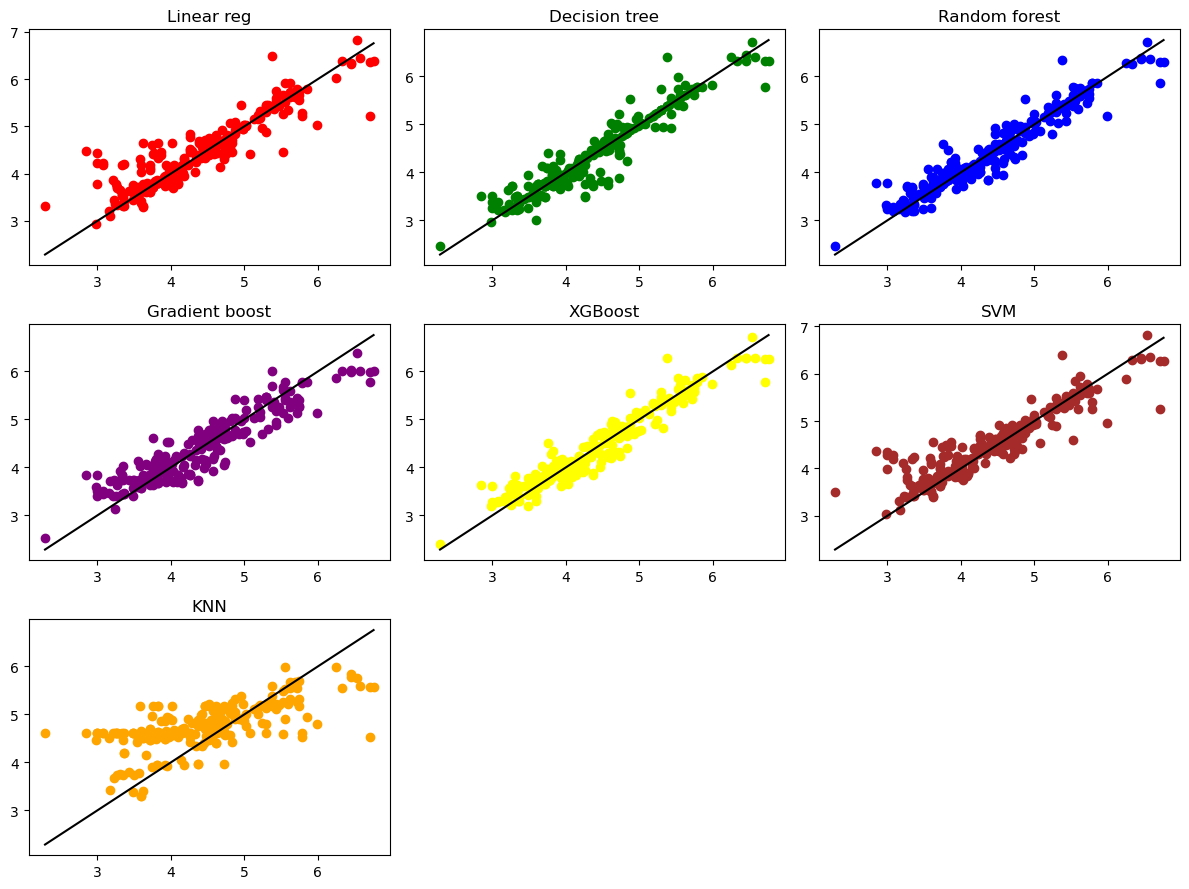

In [35]:
figs = [lr_pred, dec_pred, rf_pred, gb_pred, xgb_pred, svm_pred, knn_pred]
titles = ['Linear reg', 'Decision tree', 'Random forest', 'Gradient boost', 'XGBoost', 'SVM', 'KNN']
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'orange']
plt.figure(figsize=(12,9))
for idx, pred in enumerate(figs, 1):
    plt.subplot(3, 3, idx)
    plt.title(titles[idx-1])

    plt.scatter(y_test, pred, c=colors[idx-1])
    plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], c='black')
    plt.tight_layout()
plt.show()

***Observation***

linear Regression Accuracy = 0.81,
Decision Tree Accuracy = 0.91,
Random Forest Accuracy = 0.92,
Gradient boost = 0.85,
XGBoost = 0.92,
SVM Accuracy = 0.81,
KNN = 0.26

XGBoosting gives the highest R2 score of 0.92, Indicating 92% amoung all the algorithms